# STUDENT ACADEMIC SUCCESS PREDICTION
Student success can be significantly improved through the early detection of struggling students and the taking of preventive measures. Studies have shown that Machine Learning (ML) has the potential to help address challenges like academic underachievement, dropout rates, and graduation delays. The data attributes include student grades, demographic, social, and school-related features, and it was collected using school reports and questionnaires. 

I have classified these students using five well-known ML ensemble models into two categories, "successful" and "not-successful" according to their average grade score performance. Then I compared the test accuracy performance of five well-known ML ensemble models, including support vector machines (SVMs), Decision Trees, Adaptive Boosting, Random Forests, and Gradient Boosting. The results of the comparative analysis indicate that Random Forest provides the highest test accuracy of 73.20%. 

Dataset available at: http://archive.ics.uci.edu/ml/datasets/Student+Performance

# Table of Content
1. Import Packages
2. Load Dataset
3. Data Preprocessing and Feature extraction 
    - 3.1 Data Preview and Data preprocessing
    - 3.2 Exploratory Data Analysis - Correlation 
    - 3.3 Feature extraction
    - 3.4 Features summary statistics
4. Data Preprocessing and Feature Transformation
    - 4.1 Feature transformation- label encoding
    - 4.2 Split data
    - 4.3 Feature transformation- One-Hot encoding
5. Build ML ensemble models 
6. Model evaluation and Selection 

# 1. Import Packages

In [1]:

import numpy as np  
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
import pickle
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from xgboost import XGBRegressor, plot_importance
from xgboost import XGBClassifier
sns.set_style('darkgrid')

In [ ]:
!pip install --upgrade scikit-learn
import sklearn
print(sklearn.__version__)

In [ ]:
pip install --upgrade pip


# 2. Load Dataset

In [2]:
train_mat = pd.read_csv('student-mat.csv')
train_por = pd.read_csv('student-por.csv')

# 3. Data Preprocessing and Feature extraction
## 3.1 Data Preview and Data preprocessing 

In [3]:
# 3.1 Data Preview and preprocessing 

# Display a small section of our data(first 5 rows)
train_por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [4]:
train_mat.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [5]:
data=pd.concat([train_por, train_mat], axis=0) 

In [6]:
#create a column for grade average
data['GAvg'] = (data['G1'] + data['G2'] + data['G3']) / 3

In [7]:
data['GAvg'] = data['GAvg'].astype(int)

In [8]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,GAvg
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,4,0,11,11,7
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,2,9,11,11,10
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,6,12,13,12,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,0,14,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,0,11,13,13,12


In [9]:
# Convert dependent variable "final_score" to categorical variable and store it new column 'FinalGrade'
# Create finalGrade column
data['grades'] = 'na'
#convert G3 to categorical variable and store it in finalscore
#data.loc[(data.GAvg >= 18) & (data.GAvg <= 20), 'grades'] = 'Excellent' 
#data.loc[(data.GAvg >= 15) & (data.GAvg <= 17), 'grades'] = 'Good' 
data.loc[(data.GAvg >= 11) & (data.GAvg <= 20), 'grades'] = ' Successful ' 
data.loc[(data.GAvg >= 0) & (data.GAvg <= 10), 'grades'] = ' Not-Successful'

In [10]:
# rename column labels
data.columns = ['school','sex','age','address','family_size','parents_status','mother_education','father_education','mother_job','father_job','reason','guardian','commute_time','study_time','failures','school_support', 'family_support','paid_classes','activities','nursery','desire_higher_edu','internet','romantic','family_quality','free_time','go_out','weekday_alcohol_usage','weekend_alcohol_usage','health','absences','period1_score','period2_score','final_score','Average_grade','grades']


In [11]:
# Display a small section of our data(first 5 rows)
data.head()

,school,sex,age,address,family_size,parents_status,mother_education,father_education,mother_job,father_job,...,go_out,weekday_alcohol_usage,weekend_alcohol_usage,health,absences,period1_score,period2_score,final_score,Average_grade,grades
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,1,1,3,4,0,11,11,7,Not-Successful
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,1,1,3,2,9,11,11,10,Not-Successful
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,2,2,3,3,6,12,13,12,12,Successful
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,1,1,5,0,14,14,14,14,Successful
4,GP,F,16,U,GT3,T,3,3,other,other,...,2,1,2,5,0,11,13,13,12,Successful


In [12]:
#preview data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1044 entries, 0 to 394
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   school                 1044 non-null   object
 1   sex                    1044 non-null   object
 2   age                    1044 non-null   int64 
 3   address                1044 non-null   object
 4   family_size            1044 non-null   object
 5   parents_status         1044 non-null   object
 6   mother_education       1044 non-null   int64 
 7   father_education       1044 non-null   int64 
 8   mother_job             1044 non-null   object
 9   father_job             1044 non-null   object
 10  reason                 1044 non-null   object
 11  guardian               1044 non-null   object
 12  commute_time           1044 non-null   int64 
 13  study_time             1044 non-null   int64 
 14  failures               1044 non-null   int64 
 15  school_support        

In [13]:
#check dimension of data
data.shape

(1044, 35)

In [14]:
# look for missing values in data
data.isnull().sum()

school                   0
sex                      0
age                      0
address                  0
family_size              0
parents_status           0
mother_education         0
father_education         0
mother_job               0
father_job               0
reason                   0
guardian                 0
commute_time             0
study_time               0
failures                 0
school_support           0
family_support           0
paid_classes             0
activities               0
nursery                  0
desire_higher_edu        0
internet                 0
romantic                 0
family_quality           0
free_time                0
go_out                   0
weekday_alcohol_usage    0
weekend_alcohol_usage    0
health                   0
absences                 0
period1_score            0
period2_score            0
final_score              0
Average_grade            0
grades                   0
dtype: int64

In [15]:
#no null values in data
data.dropna().shape

(1044, 35)

In [16]:
#no duplicates in data_por
data=data.drop_duplicates(subset=None, keep='first', inplace=False)
data.shape  

(1044, 35)

In [17]:
#Data types of the various columns
data.dtypes

school                   object
sex                      object
age                       int64
address                  object
family_size              object
parents_status           object
mother_education          int64
father_education          int64
mother_job               object
father_job               object
reason                   object
guardian                 object
commute_time              int64
study_time                int64
failures                  int64
school_support           object
family_support           object
paid_classes             object
activities               object
nursery                  object
desire_higher_edu        object
internet                 object
romantic                 object
family_quality            int64
free_time                 int64
go_out                    int64
weekday_alcohol_usage     int64
weekend_alcohol_usage     int64
health                    int64
absences                  int64
period1_score             int64
period2_

## 3.2 Exploratory Data Analysis - Correlation 

In [18]:
# Correlation 
data.corr()

,age,mother_education,father_education,commute_time,study_time,failures,family_quality,free_time,go_out,weekday_alcohol_usage,weekend_alcohol_usage,health,absences,period1_score,period2_score,final_score,Average_grade
age,1.000000,-0.130196,-0.138521,0.049216,-0.007870,0.282364,0.007162,0.002645,0.118510,0.133453,0.098291,-0.029129,0.153196,-0.124121,-0.119475,-0.125282,-0.130398
mother_education,-0.130196,1.000000,0.642063,-0.238181,0.090616,-0.187769,0.015004,0.001054,0.025614,0.001515,-0.029331,-0.013254,0.059708,0.226101,0.224662,0.201472,0.225656
father_education,-0.138521,0.642063,1.000000,-0.196328,0.033458,-0.191390,0.013066,0.002142,0.030075,-0.000165,0.019524,0.034288,0.040829,0.195898,0.182634,0.159796,0.186409
commute_time,0.049216,-0.238181,-0.196328,1.000000,-0.081328,0.087177,-0.012578,-0.007403,0.049740,0.109423,0.084292,-0.029002,-0.022669,-0.121053,-0.140163,-0.102627,-0.124840
study_time,-0.007870,0.090616,0.033458,-0.081328,1.000000,-0.152024,0.012324,-0.094429,-0.072941,-0.159665,-0.229073,-0.063044,-0.075594,0.211314,0.183167,0.161629,0.196588
failures,0.282364,-0.187769,-0.191390,0.087177,-0.152024,1.000000,-0.053676,0.102679,0.074683,0.116336,0.107432,0.048311,0.099998,-0.374175,-0.377172,-0.383145,-0.398769
family_quality,0.007162,0.015004,0.013066,-0.012578,0.012324,-0.053676,1.000000,0.136901,0.080619,-0.076483,-0.100663,0.104101,-0.062171,0.036947,0.042054,0.054461,0.044782
free_time,0.002645,0.001054,0.002142,-0.007403,-0.094429,0.102679,0.136901,1.000000,0.323556,0.144979,0.130377,0.081517,-0.032079,-0.051985,-0.068952,-0.064890,-0.068227
go_out,0.118510,0.025614,0.030075,0.049740,-0.072941,0.074683,0.080619,0.323556,1.000000,0.253135,0.399794,-0.013736,0.056142,-0.101163,-0.108411,-0.097877,-0.103985
weekday_alcohol_usage,0.133453,0.001515,-0.000165,0.109423,-0.159665,0.116336,-0.076483,0.144979,0.253135,1.000000,0.627814,0.065515,0.132867,-0.150943,-0.131576,-0.129642,-0.145018


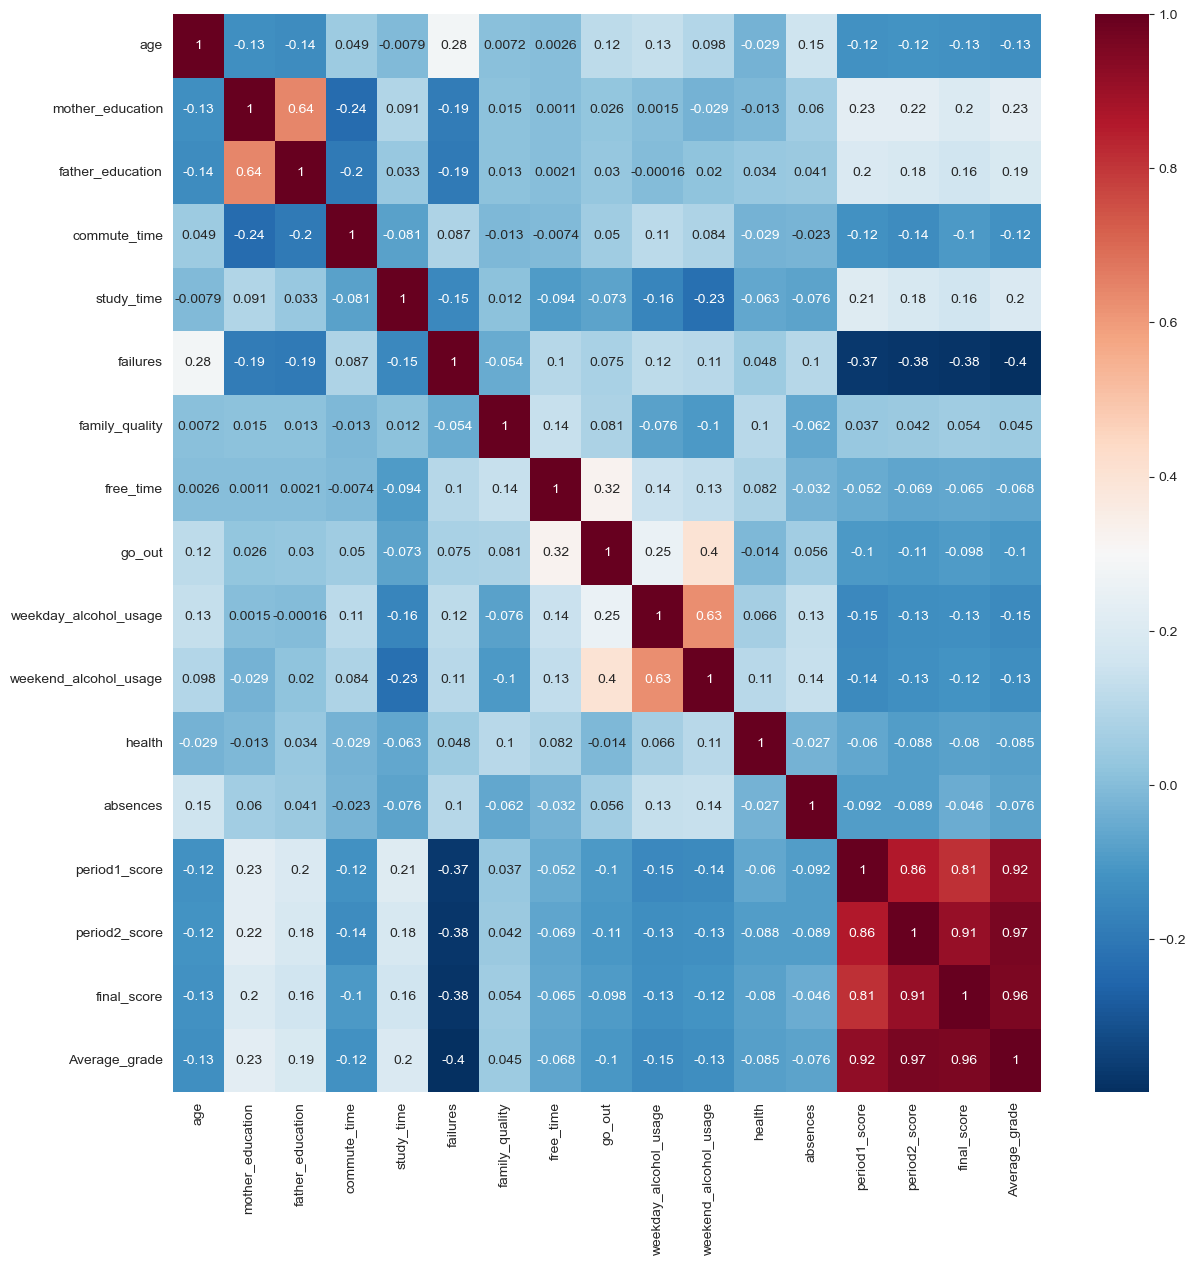

In [19]:
# Correlation heatmap
plt.figure(figsize=(14,14))
sns.heatmap(data.corr(), annot=True, cmap= 'RdBu_r')
plt.show()



## 3.3 Feature Extraction

In [20]:
#drop independent variables that are highly correlated ('period1_score','period2_score', 'final_score')
#drop irrelevant features ('age', 'school', 'sex',) 
data = data.drop(labels=['period1_score','period2_score','final_score'],axis=1)

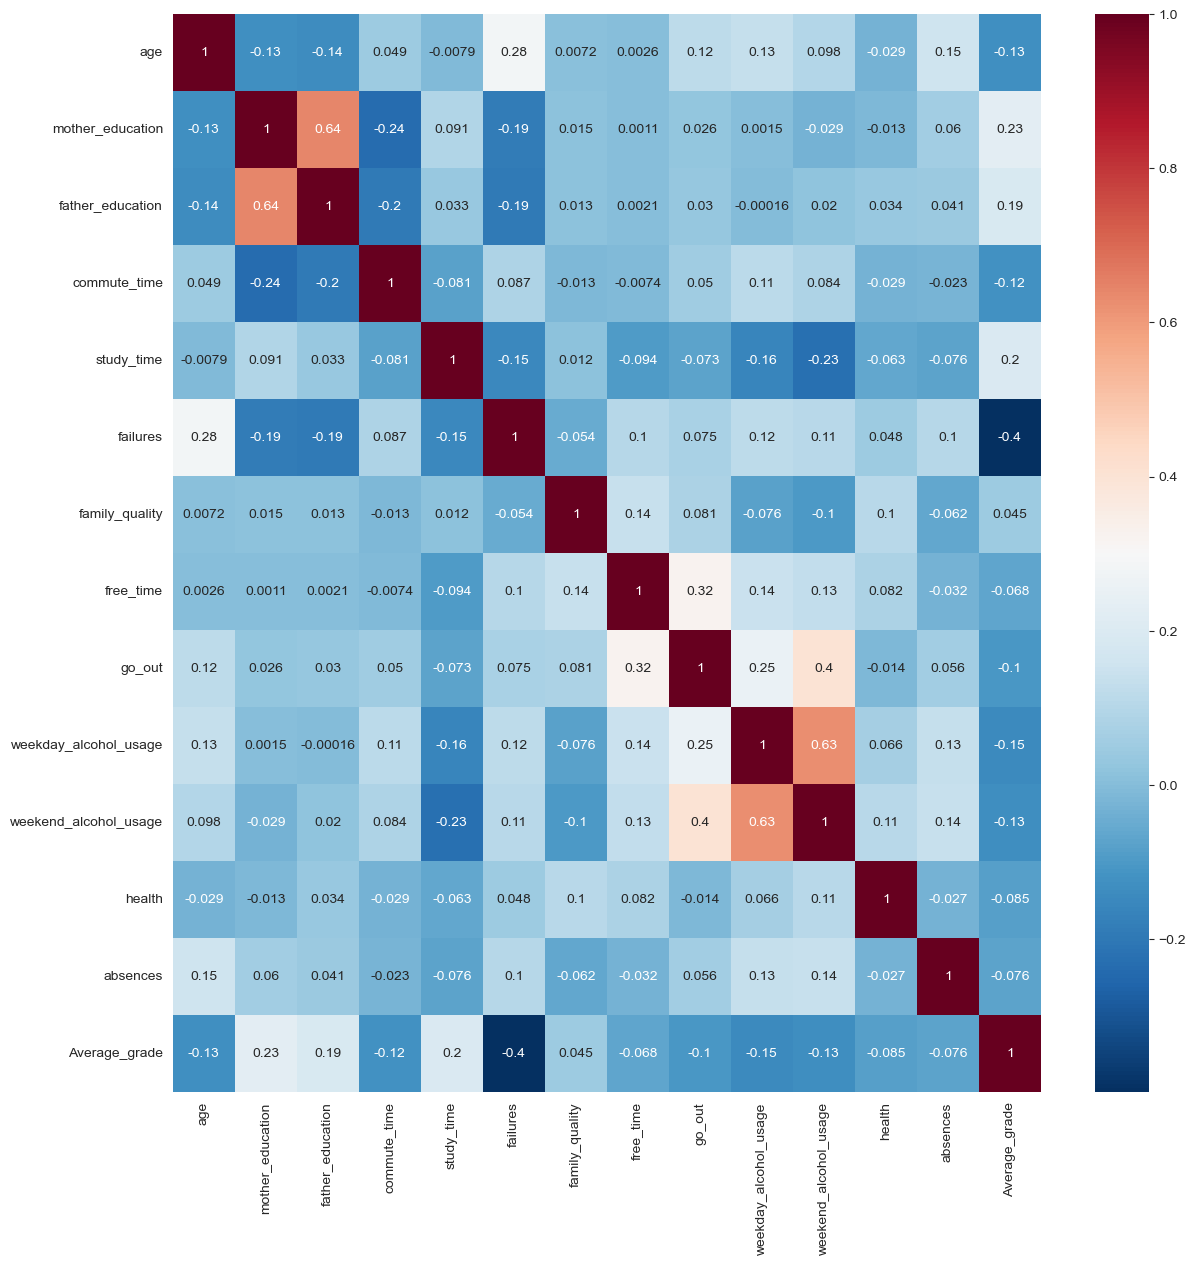

In [21]:
plt.figure(figsize=(14,14))
sns.heatmap(data.corr(), annot=True, cmap= 'RdBu_r')
plt.show()


## 3.4 Features summary statistics

In [22]:
#Display the numeric features’ summary statistics
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1044.0,16.726054,1.239975,15.0,16.0,17.0,18.0,22.0
mother_education,1044.0,2.603448,1.124907,0.0,2.0,3.0,4.0,4.0
father_education,1044.0,2.387931,1.099938,0.0,1.0,2.0,3.0,4.0
commute_time,1044.0,1.522989,0.731727,1.0,1.0,1.0,2.0,4.0
study_time,1044.0,1.970307,0.834353,1.0,1.0,2.0,2.0,4.0
failures,1044.0,0.264368,0.656142,0.0,0.0,0.0,0.0,3.0
family_quality,1044.0,3.935824,0.933401,1.0,4.0,4.0,5.0,5.0
free_time,1044.0,3.201149,1.031507,1.0,3.0,3.0,4.0,5.0
go_out,1044.0,3.156130,1.152575,1.0,2.0,3.0,4.0,5.0
weekday_alcohol_usage,1044.0,1.494253,0.911714,1.0,1.0,1.0,2.0,5.0


In [23]:
# Summary statistics of the Categorical features
data.describe(include='object').T

,count,unique,top,freq
school,1044,2,GP,772
sex,1044,2,F,591
address,1044,2,U,759
family_size,1044,2,GT3,738
parents_status,1044,2,T,923
mother_job,1044,5,other,399
father_job,1044,5,other,584
reason,1044,4,course,430
guardian,1044,3,mother,728
school_support,1044,2,no,925


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1044 entries, 0 to 394
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   school                 1044 non-null   object
 1   sex                    1044 non-null   object
 2   age                    1044 non-null   int64 
 3   address                1044 non-null   object
 4   family_size            1044 non-null   object
 5   parents_status         1044 non-null   object
 6   mother_education       1044 non-null   int64 
 7   father_education       1044 non-null   int64 
 8   mother_job             1044 non-null   object
 9   father_job             1044 non-null   object
 10  reason                 1044 non-null   object
 11  guardian               1044 non-null   object
 12  commute_time           1044 non-null   int64 
 13  study_time             1044 non-null   int64 
 14  failures               1044 non-null   int64 
 15  school_support        

In [25]:
data.corr().T

,age,mother_education,father_education,commute_time,study_time,failures,family_quality,free_time,go_out,weekday_alcohol_usage,weekend_alcohol_usage,health,absences,Average_grade
age,1.000000,-0.130196,-0.138521,0.049216,-0.007870,0.282364,0.007162,0.002645,0.118510,0.133453,0.098291,-0.029129,0.153196,-0.130398
mother_education,-0.130196,1.000000,0.642063,-0.238181,0.090616,-0.187769,0.015004,0.001054,0.025614,0.001515,-0.029331,-0.013254,0.059708,0.225656
father_education,-0.138521,0.642063,1.000000,-0.196328,0.033458,-0.191390,0.013066,0.002142,0.030075,-0.000165,0.019524,0.034288,0.040829,0.186409
commute_time,0.049216,-0.238181,-0.196328,1.000000,-0.081328,0.087177,-0.012578,-0.007403,0.049740,0.109423,0.084292,-0.029002,-0.022669,-0.124840
study_time,-0.007870,0.090616,0.033458,-0.081328,1.000000,-0.152024,0.012324,-0.094429,-0.072941,-0.159665,-0.229073,-0.063044,-0.075594,0.196588
failures,0.282364,-0.187769,-0.191390,0.087177,-0.152024,1.000000,-0.053676,0.102679,0.074683,0.116336,0.107432,0.048311,0.099998,-0.398769
family_quality,0.007162,0.015004,0.013066,-0.012578,0.012324,-0.053676,1.000000,0.136901,0.080619,-0.076483,-0.100663,0.104101,-0.062171,0.044782
free_time,0.002645,0.001054,0.002142,-0.007403,-0.094429,0.102679,0.136901,1.000000,0.323556,0.144979,0.130377,0.081517,-0.032079,-0.068227
go_out,0.118510,0.025614,0.030075,0.049740,-0.072941,0.074683,0.080619,0.323556,1.000000,0.253135,0.399794,-0.013736,0.056142,-0.103985
weekday_alcohol_usage,0.133453,0.001515,-0.000165,0.109423,-0.159665,0.116336,-0.076483,0.144979,0.253135,1.000000,0.627814,0.065515,0.132867,-0.145018


In [26]:
data.columns

Index(['school', 'sex', 'age', 'address', 'family_size', 'parents_status',
       'mother_education', 'father_education', 'mother_job', 'father_job',
       'reason', 'guardian', 'commute_time', 'study_time', 'failures',
       'school_support', 'family_support', 'paid_classes', 'activities',
       'nursery', 'desire_higher_edu', 'internet', 'romantic',
       'family_quality', 'free_time', 'go_out', 'weekday_alcohol_usage',
       'weekend_alcohol_usage', 'health', 'absences', 'Average_grade',
       'grades'],
      dtype='object')

In [27]:
# drop duplicate features - drop 'Average_grade' since it was coverted to catoerical data 
data = data.drop(labels=['Average_grade'],axis=1)

In [28]:
#list non numeric columns
nonnumeric_columns = [data.columns[index] for index, dtype in enumerate(data.dtypes) if dtype == 'object']
nonnumeric_columns

['school',
 'sex',
 'address',
 'family_size',
 'parents_status',
 'mother_job',
 'father_job',
 'reason',
 'guardian',
 'school_support',
 'family_support',
 'paid_classes',
 'activities',
 'nursery',
 'desire_higher_edu',
 'internet',
 'romantic',
 'grades']

In [29]:
#find unique values in each nonnumeric list
for column in nonnumeric_columns:
    print(f"{column}: {data[column].unique()}")

school: ['GP' 'MS']
sex: ['F' 'M']
address: ['U' 'R']
family_size: ['GT3' 'LE3']
parents_status: ['A' 'T']
mother_job: ['at_home' 'health' 'other' 'services' 'teacher']
father_job: ['teacher' 'other' 'services' 'health' 'at_home']
reason: ['course' 'other' 'home' 'reputation']
guardian: ['mother' 'father' 'other']
school_support: ['yes' 'no']
family_support: ['no' 'yes']
paid_classes: ['no' 'yes']
activities: ['no' 'yes']
nursery: ['yes' 'no']
desire_higher_edu: ['yes' 'no']
internet: ['no' 'yes']
romantic: ['no' 'yes']
grades: [' Not-Successful' ' Successful ']


# 4. Data Preprocessing and Feature Transformation

## 4.1 Feature transformation- label encoding

In [30]:
# create dataframe df for classification
df = data.copy()

In [31]:
#Encode the dependent variable
# label encode grades
le = preprocessing.LabelEncoder()
df.grades = le.fit_transform(df.grades)

## 4.2 Split data

In [32]:
##split dataset into dependant (target) and independant features(predictor)
X = df.drop('grades',axis=1)
y = df.grades
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=1, stratify=y)

In [33]:
X_train.columns

Index(['school', 'sex', 'age', 'address', 'family_size', 'parents_status',
       'mother_education', 'father_education', 'mother_job', 'father_job',
       'reason', 'guardian', 'commute_time', 'study_time', 'failures',
       'school_support', 'family_support', 'paid_classes', 'activities',
       'nursery', 'desire_higher_edu', 'internet', 'romantic',
       'family_quality', 'free_time', 'go_out', 'weekday_alcohol_usage',
       'weekend_alcohol_usage', 'health', 'absences'],
      dtype='object')

In [34]:
X_train.shape

(835, 30)

In [35]:
X_test.shape

(209, 30)

In [36]:
y_train.shape

(835,)

In [37]:
y_test.shape

(209,)

## 4.3 Feature transformation- label encoding, One-Hot encoding

In [38]:
#Encode the independent categorical variable
#feature transformation- One-Hot-encoding
# get dummy varibles 
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [39]:
X_train.columns

Index(['age', 'mother_education', 'father_education', 'commute_time',
       'study_time', 'failures', 'family_quality', 'free_time', 'go_out',
       'weekday_alcohol_usage', 'weekend_alcohol_usage', 'health', 'absences',
       'school_GP', 'school_MS', 'sex_F', 'sex_M', 'address_R', 'address_U',
       'family_size_GT3', 'family_size_LE3', 'parents_status_A',
       'parents_status_T', 'mother_job_at_home', 'mother_job_health',
       'mother_job_other', 'mother_job_services', 'mother_job_teacher',
       'father_job_at_home', 'father_job_health', 'father_job_other',
       'father_job_services', 'father_job_teacher', 'reason_course',
       'reason_home', 'reason_other', 'reason_reputation', 'guardian_father',
       'guardian_mother', 'guardian_other', 'school_support_no',
       'school_support_yes', 'family_support_no', 'family_support_yes',
       'paid_classes_no', 'paid_classes_yes', 'activities_no',
       'activities_yes', 'nursery_no', 'nursery_yes', 'desire_higher_edu_no'

In [40]:
X_train.shape

(835, 56)

In [41]:
X_test.shape

(209, 56)

In [42]:
y_train.shape

(835,)

In [43]:
y_test.shape

(209,)

In [44]:
y_test.shape

(209,)

In [45]:
y_test

37     1
327    0
295    1
292    1
631    1
      ..
579    0
607    1
142    1
499    1
15     1
Name: grades, Length: 209, dtype: int64

## 5. Build ML ensemble models 

In [46]:
names = [ "SVM", "Gradient_Boosting", "Decision_Tree", "Random_Forest", "AdaBoost"]

classifiers = [
    SVC(),
    GradientBoostingClassifier(n_estimators=100, learning_rate=1.0),
    DecisionTreeClassifier(max_depth=17),
    RandomForestClassifier(max_depth=5, n_estimators=100),
    AdaBoostClassifier(n_estimators=100),]

In [47]:
#fit the model and test the model 
scores = []
for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    scores.append(score)

In [48]:
scores

[0.7272727272727273,
 0.6985645933014354,
 0.6889952153110048,
 0.7272727272727273,
 0.7177033492822966]

In [49]:
dfm = pd.DataFrame()
dfm['name'] = names
dfm['score'] = scores
dfm

,name,score
0,SVM,0.727273
1,Gradient_Boosting,0.698565
2,Decision_Tree,0.688995
3,Random_Forest,0.727273
4,AdaBoost,0.717703


In [50]:
cm = sns.light_palette("blue", as_cmap=True)
s = dfm.style.background_gradient(cmap=cm)
s

,name,score
0,SVM,0.727273
1,Gradient_Boosting,0.698565
2,Decision_Tree,0.688995
3,Random_Forest,0.727273
4,AdaBoost,0.717703


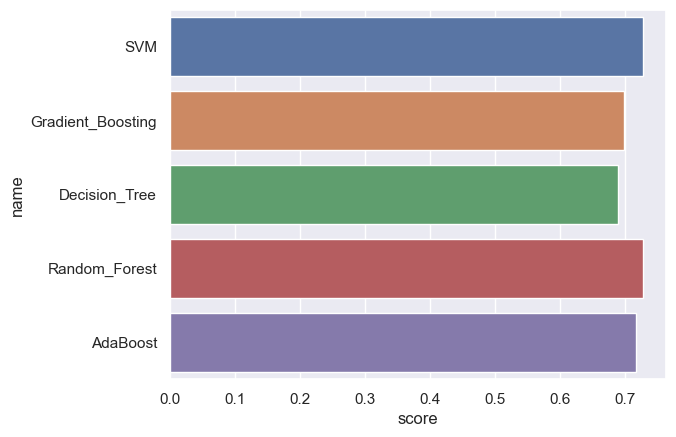

In [51]:
sns.set(style="darkgrid")
ax = sns.barplot(y="name", x="score", data=dfm)

# 5.1  Decision Tree

In [52]:
# find the optimal # of minimum samples leaf
from sklearn.tree import DecisionTreeClassifier

msl=[]
for i in range(1,58):
    tree = DecisionTreeClassifier(min_samples_leaf=i)
    t= tree.fit(X_train, y_train)
    ts=t.score(X_test, y_test)
    msl.append(ts)
msl = pd.Series(msl)
msl.where(msl==msl.max()).dropna()

22    0.741627
24    0.741627
dtype: float64

In [53]:
# final model
tree = DecisionTreeClassifier(min_samples_leaf=17)
t= tree.fit(X_train, y_train)
print("Decisioin Tree Model Score" , ":" , t.score(X_train, y_train) , "," , 
      "Cross Validation Score" ,":" , t.score(X_test, y_test))
print('Training accuracy:', np.mean(tree.predict(X_train )== y_train)*100)
print('Test accuracy:', np.mean(tree.predict(X_test )== y_test)*100)

Decisioin Tree Model Score : 0.7604790419161677 , Cross Validation Score : 0.7177033492822966
Training accuracy: 76.04790419161677
Test accuracy: 71.77033492822966


# 5.2 Random Forest 

In [54]:
# find a good # of estimators
ne=[]
for i in range(1,58):
    forest = RandomForestClassifier()
    f = forest.fit(X_train, y_train)
    fs = f.score(X_test, y_test)
    ne.append(fs)
ne = pd.Series(ne)
ne.where(ne==ne.max()).dropna()

19    0.736842
40    0.736842
48    0.736842
dtype: float64

In [55]:
# find a good # of min_samples_leaf
ne=[]
for i in range(1,58):
    forest = RandomForestClassifier(n_estimators=36, min_samples_leaf=i)
    f = forest.fit(X_train, y_train)
    fs = f.score(X_test, y_test)
    ne.append(fs)
ne = pd.Series(ne)
ne.where(ne==ne.max()).dropna()

4    0.755981
dtype: float64

In [56]:
#final model
forest = RandomForestClassifier(n_estimators=100, min_samples_leaf=2)
f = forest.fit(X_train, y_train)
print("Raondom Forest Model Score" , ":" , f.score(X_train, y_train) , "," ,
      "Cross Validation Score" ,":" , f.score(X_test, y_test))

print('Training accuracy:', np.mean(forest.predict(X_train )== y_train)*100)
print('Test accuracy:', np.mean(forest.predict(X_test )== y_test)*100)

Raondom Forest Model Score : 0.9580838323353293 , Cross Validation Score : 0.7464114832535885
Training accuracy: 95.80838323353294
Test accuracy: 74.64114832535886


# 5.3 Adaptive Boosting

In [57]:
ada = AdaBoostClassifier(n_estimators=2)
af = ada.fit(X_train, y_train)
print("Ada Boost Model Score" , ":" , af.score(X_train, y_train) , "," ,
      "Cross Validation Score" ,":" , af.score(X_test, y_test))
print('Training accuracy:', np.mean(ada.predict(X_train )== y_train)*100)
print('Test accuracy:', np.mean(ada.predict(X_test )== y_test)*100)

Ada Boost Model Score : 0.6742514970059881 , Cross Validation Score : 0.6602870813397129
Training accuracy: 67.42514970059881
Test accuracy: 66.02870813397129


# 5.4 Gradient Boosting

In [58]:
GradientBoosting = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0),
GradB = GradientBoosting.fit(X_train, y_train)
print("Ada Boost Model Score" , ":" , GradB.score(X_train, y_train) , "," ,
      "Cross Validation Score" ,":" , GradB.score(X_test, y_test))
print('Training accuracy:', GradientBoosting.mean(Gb.predict(X_train )== y_train)*100)
print('Test accuracy:', GradientBoosting.mean(Gb.predict(X_test )== y_test)*100)

AttributeError: 'tuple' object has no attribute 'fit'

## 5.5 Support Vector Machines

In [59]:
svc = SVC()
s= svc.fit(X_train, y_train)
print("SVC Model Score" , ":" , s.score(X_train, y_train) , "," ,
      "Cross Validation Score" ,":" , s.score(X_test, y_test))
print('Training accuracy:', np.mean(svc.predict(X_train )== y_train)*100)
print('Test accuracy:', np.mean(svc.predict(X_test )== y_test)*100)


SVC Model Score : 0.7089820359281437 , Cross Validation Score : 0.7272727272727273
Training accuracy: 70.89820359281437
Test accuracy: 72.72727272727273


In [60]:
# View confusion matrix for test data and predictions
y_pred_test= forest.predict(X_test) 

confusion_matrix(y_test, y_pred_test)

array([[65, 29],
       [24, 91]])

NameError: name 'tick_marks' is not defined

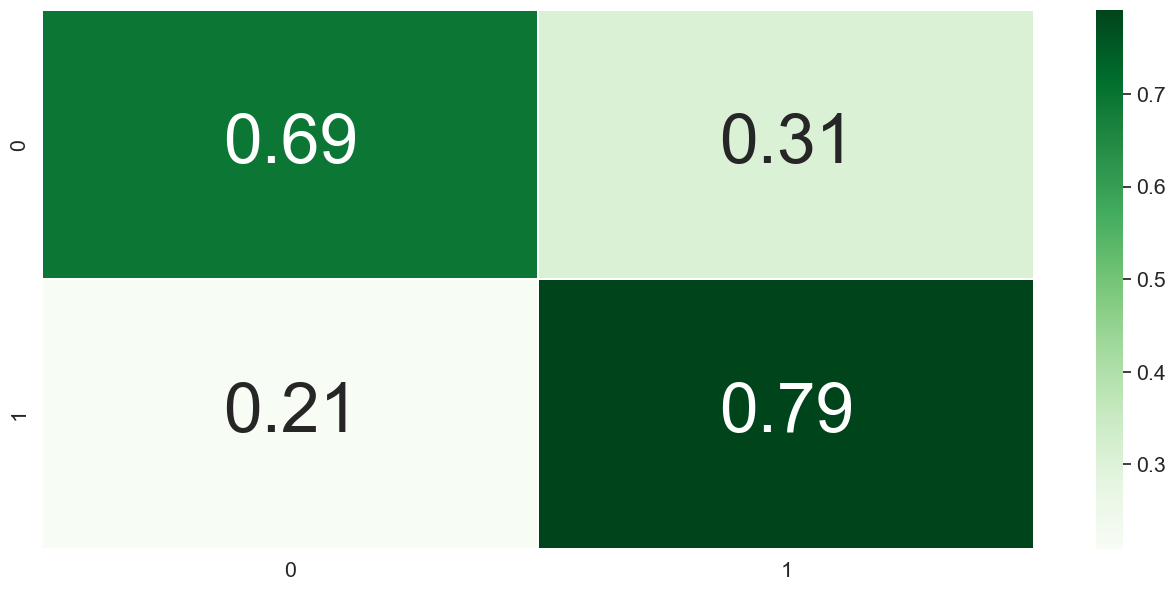

In [61]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, y_pred_test)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':50},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
#class_names = ['Poor' 'Satisfactory' 'Good' 'Excellent']
#tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, rotation=25)
plt.yticks(tick_marks2, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [62]:
##Pickling The Model file For Deployment
pickle.dump(forest,open('Random_Forestmodel.pkl','wb'))


# 6. Model evaluation for Selected Model- Random Forest 

## 6.1 Feature Enigineering 

In [63]:
model = XGBClassifier()
model=XGBClassifier(learning_rate=0.1,n_estimators=100)

In [64]:
model.fit(X_train,y_train)

AttributeError: 'super' object has no attribute '__sklearn_tags__'

AttributeError: 'super' object has no attribute '__sklearn_tags__'

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

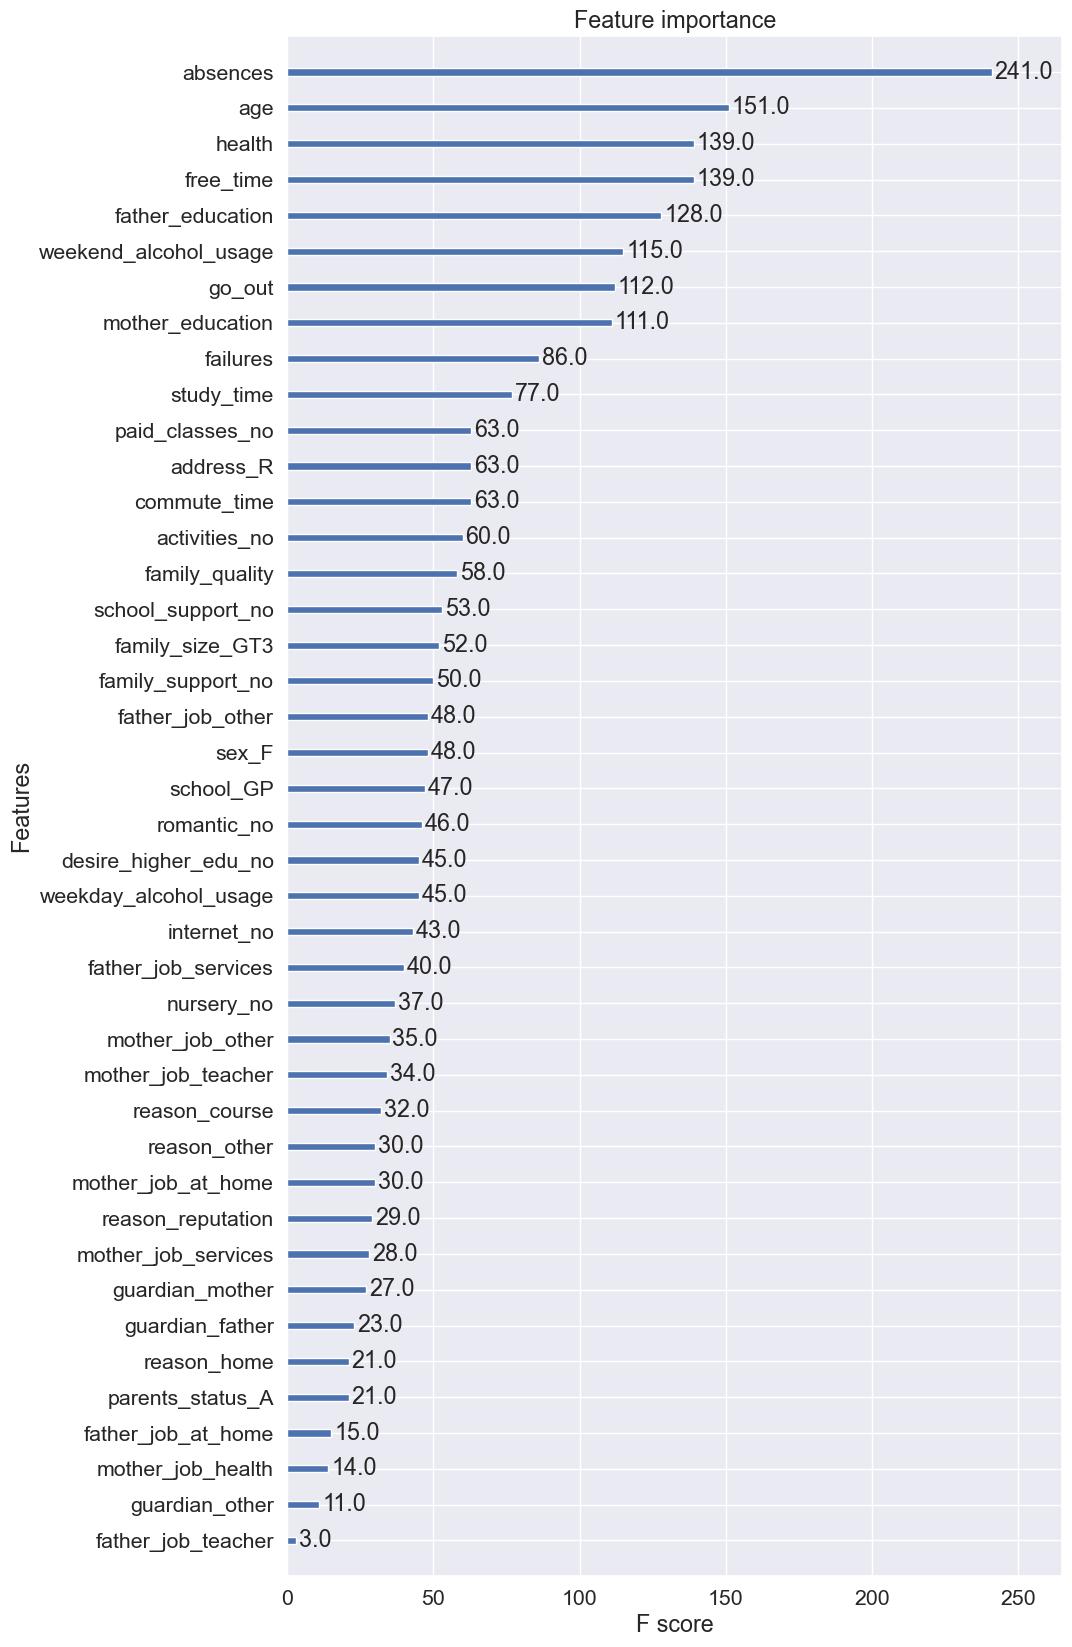

In [65]:
from xgboost import plot_importance
# plot feature importance
fig, ax = plt.subplots(figsize=(10, 20))
plot_importance(model, ax=ax)

plt.show()

In [66]:
df.columns

Index(['school', 'sex', 'age', 'address', 'family_size', 'parents_status',
       'mother_education', 'father_education', 'mother_job', 'father_job',
       'reason', 'guardian', 'commute_time', 'study_time', 'failures',
       'school_support', 'family_support', 'paid_classes', 'activities',
       'nursery', 'desire_higher_edu', 'internet', 'romantic',
       'family_quality', 'free_time', 'go_out', 'weekday_alcohol_usage',
       'weekend_alcohol_usage', 'health', 'absences', 'grades'],
      dtype='object')

In [67]:
df.shape

(1044, 31)

In [68]:
#drop irrelevant features and features that dont have strong F score 

In [69]:
df = df.drop(labels=['school', 'sex','address', 'family_size', 'parents_status', 'mother_job', 'father_job', 'reason', 'guardian', 'activities', 'nursery',
       'desire_higher_edu', 'internet', 'family_support', 'school_support' ],axis=1)

In [70]:
df.columns


Index(['age', 'mother_education', 'father_education', 'commute_time',
       'study_time', 'failures', 'paid_classes', 'romantic', 'family_quality',
       'free_time', 'go_out', 'weekday_alcohol_usage', 'weekend_alcohol_usage',
       'health', 'absences', 'grades'],
      dtype='object')

In [71]:

df.shape

(1044, 16)

In [72]:
df.to_csv('student_input.csv', index=False)

In [73]:
# create dataframe df for classification
df_input = df.copy()

In [74]:
df_input

,age,mother_education,father_education,commute_time,study_time,failures,paid_classes,romantic,family_quality,free_time,go_out,weekday_alcohol_usage,weekend_alcohol_usage,health,absences,grades
0,18,4,4,2,2,0,no,no,4,3,4,1,1,3,4,0
1,17,1,1,1,2,0,no,no,5,3,3,1,1,3,2,0
2,15,1,1,1,2,0,no,no,4,3,2,2,3,3,6,1
3,15,4,2,1,3,0,no,yes,3,2,2,1,1,5,0,1
4,16,3,3,1,2,0,no,no,4,3,2,1,2,5,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,2,2,1,2,2,yes,no,5,5,4,4,5,4,11,0
391,17,3,1,2,1,0,no,no,2,4,5,3,4,2,3,1
392,21,1,1,1,1,3,no,no,5,5,3,3,3,3,3,0
393,18,3,2,3,1,0,no,no,4,4,1,3,4,5,0,1


In [75]:
#split data
##split dataset into dependant (target) and independant features(predictor)
X = df_input.drop('grades',axis=1)
y = df_input.grades
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=1, stratify=y)

In [76]:
#Encode the independent categorical variable
#feature transformation- One-Hot-encoding
# get dummy varibles 
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [77]:
X_train.shape

(835, 17)

In [ ]:
y_train.shape


In [ ]:
X_test.shape

In [ ]:
y_test.shape

In [ ]:
#Random Forrest model
forest = RandomForestClassifier(n_estimators=100, min_samples_leaf=2)
f = forest.fit(X_train, y_train)
print("Raondom Forest Model Score" , ":" , f.score(X_train, y_train) , "," ,
      "Cross Validation Score" ,":" , f.score(X_test, y_test))

print('Training accuracy:', np.mean(forest.predict(X_train )== y_train)*100)
print('Test accuracy:', np.mean(forest.predict(X_test )== y_test)*100)

## 6.2 Model Evaluation 

In [ ]:
# View confusion matrix for test data and predictions
y_pred_test= forest.predict(X_test) 

confusion_matrix(y_test, y_pred_test)

In [ ]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, y_pred_test)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':50},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = [' Not-Successful',  ' Successful ']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test,  y_pred_test)
print('Confusion Matrix\n')
print(confusion)

#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test,  y_pred_test)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test,  y_pred_test, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test,  y_pred_test, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test,  y_pred_test, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test,  y_pred_test, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test,  y_pred_test, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test,  y_pred_test, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test,  y_pred_test, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test,  y_pred_test, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test,  y_pred_test, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test,  y_pred_test, target_names= [' Not-Successful',  ' Successful ']))

In [ ]:
##Pickling The Model file For Deployment
pickle.dump(forest,open('Random_Forestmodel.pkl','wb'))